<a href="https://colab.research.google.com/github/gilesitorr/Estadistica_Avanzada/blob/main/Parcial_2/Tarea_1/EA_parcial2_tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Estadística Avanzada__
# Parcial 2 - Tarea 1
## _Gil Estéfano Rodríguez Rivera_

Todas las bases de datos utilizadas así como el desarrollo se encuentra en _GitHub_ en https://github.com/gilesitorr/Estadistica_Avanzada/tree/main/Parcial_2/Tarea_1

__Nota:__ En este Notebook se usó el kernel de R, aunque la extensión sea ipynb.

## Biostatistics: A Foundation for Analysis in the Health Sciences
### Wayne W. Daniel & Chad L. Cross

### 9.3.4


__Reiss et al. (A-3) compared point-of-care and standard hospital laboratory assays for monitoring patients receiving a single anticoagulant or a regimen consisting of a combination of anticoagulants. It is quite common when comparing two measuring techniques, to use regression analysis in which one variable is used to predict another. In the present study, the researchers obtained measures of international normalized ratio (INR) by assay of capillary and venous blood samples collected from 90 subjects taking warfarin. INR, used especially when patients are receiving warfarin, measures the clotting ability of the blood. Point-of-care testing for INR was conducted with the CoaguChek assay product. Hospital testing was done with standard hospital laboratory assays. The authors used the hospital assay INR level to predict the CoaguChek INR level. The measurements are given in the following table.__

__(a)__ draw a scatter diagram and

__(b)__ obtain the regression equation
and plot it on the scatter diagram

In [ ]:
# Se define el url donde está guardado el archivo csv a usar
url = "https://github.com/gilesitorr/Estadistica_Avanzada/raw/main/Parcial_2/Tarea_1/EXR_C09_S03_04.csv"

# Se lee el archivo csv desde el url que se definió
df <- read.csv(url, header=TRUE)

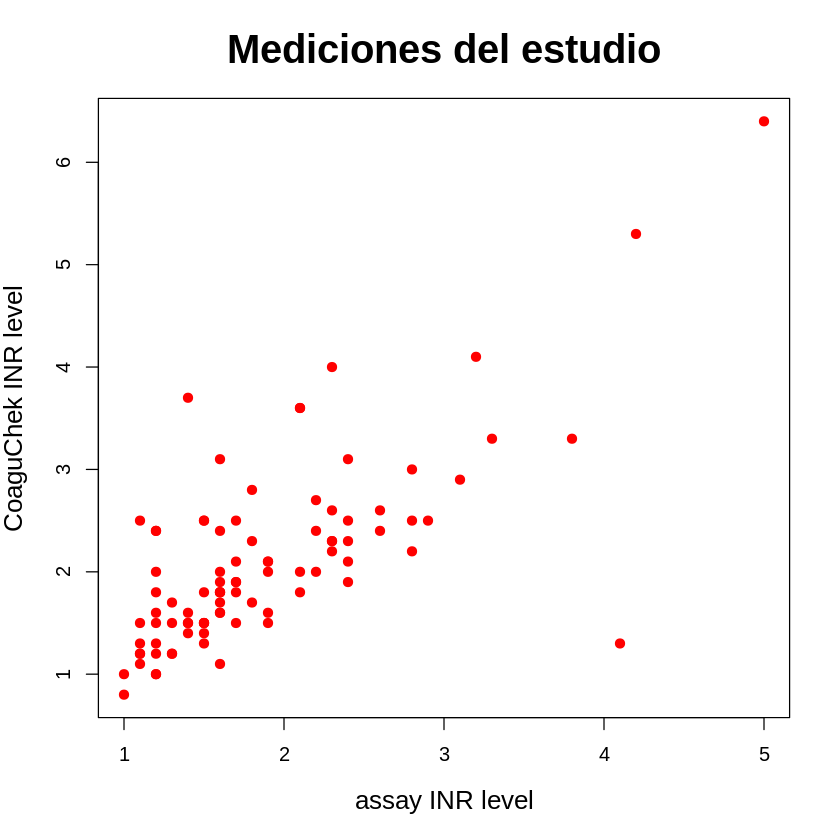

In [ ]:
# Para realizar el scatter plot, basta con añadir las columnas del dataframe a
# graficar. Además, se añaden nombres para los ejes con xlab y ylab. También
# se añade el título de la gráfica con el valor main. La función
# col sirve para determinar el color de los puntos. El parámetro
# pch sirve para definir el tipo de punto que se usa en los scatter, el pch=19
# produce puntos negros y pequeños. El cex.lab define el tamaño del texto de los
# ejes.
plot(x=df$X, y=df$Y, xlab="assay INR level", ylab="CoaguCheck INR level",
     main="Mediciones del estudio", col="red", pch=19, cex.lab=1.3, cex.main=2)

In [ ]:
# Se realiza la regresión lineal
ajuste <- lm(Y~X, data=df)
ajuste


Call:
lm(formula = Y ~ X, data = df)

Coefficients:
(Intercept)            X  
     0.4885       0.8625  


La ecuación del ajuste lineal es:

_Y = 0.86251 X + 0.48848_

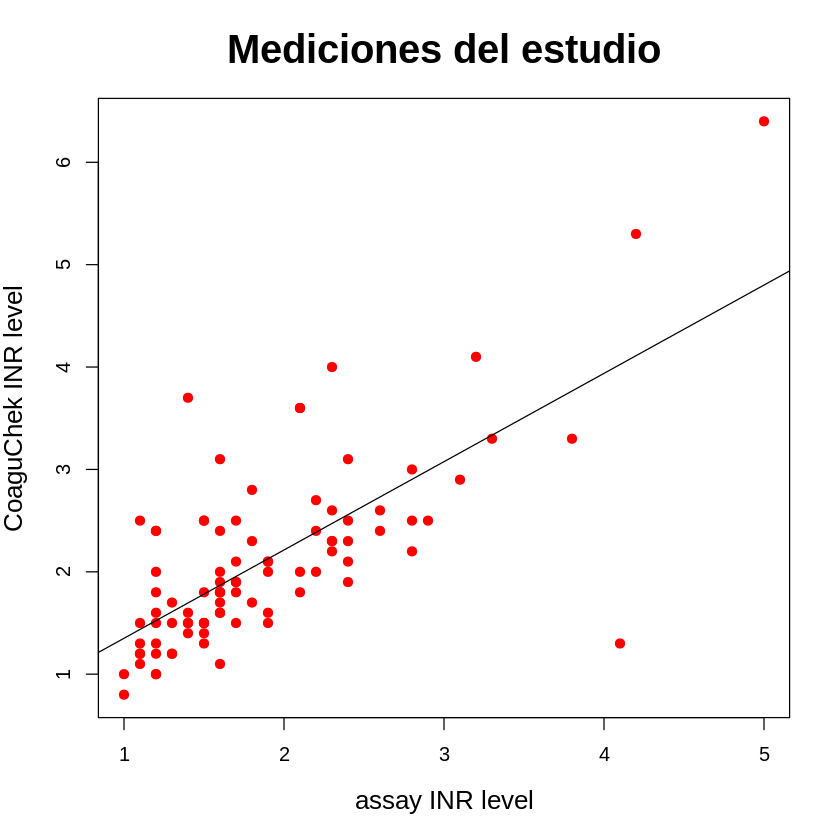

In [ ]:
# Se grafica nuevamente el scatter plot
plot(x=df$X, y=df$Y, xlab="assay INR level", ylab="CoaguChek INR level",
     main="Mediciones del estudio", col="red", pch=19, cex.lab=1.3, cex.main="2")

# Al scatterplot se le añade la recta ajustada
abline(ajuste)

### 9.4.4


__Refer to Exercise 9.3.6, and for each one do the following:__

__(a)__ Compute the coefficient of determination.

**(b)** Prepare an ANOVA table and use the F statistic to test the null hypothesis that b1 ¼ 0. Let a ¼ :05.

**(c)** Use the t statistic to test the null hypothesis that b1 ¼ 0 at the .05 level of significance.

**(d)** Determine the p value for each hypothesis test.

**(e)** State your conclusions in terms of the problem.

**(f)** Construct the 95 percent confidence interval for b1.

In [ ]:
# Se define el url donde está guardado el archivo csv a usar
url = "https://github.com/gilesitorr/Estadistica_Avanzada/raw/main/Parcial_2/Tarea_1/EXR_C09_S03_06.csv"

# Se lee el archivo csv desde el url que se definió
df <- read.csv(url, header=TRUE)

In [ ]:
# Se realiza la regresión lineal
ajuste <- lm(TROT~WALK, data=df)
summary(ajuste)


Call:
lm(formula = TROT ~ WALK, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.072  -2.148  -0.150   2.018   8.676 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13.2244     5.7246  -2.310   0.0317 *  
WALK          1.7571     0.1853   9.484 7.65e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.98 on 20 degrees of freedom
Multiple R-squared:  0.8181,	Adjusted R-squared:  0.809 
F-statistic: 89.95 on 1 and 20 DF,  p-value: 7.648e-09


El __coeficiente de determinación__ _r^2=0.8181_.

Además, con la prueba t, se puede ver que para una significancia de 0.05, tanto la intersección beta_0 (_p=0.03_) como la pendiente de la recta que se ajustó, beta_1 (_p=8 x 10^-9_) son diferentes de cero.

In [ ]:
# Se realiza ell análisis de varianza de los coeficientes
anova <- aov(ajuste)
summary(anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
WALK         1   2231  2230.8   89.95 7.65e-09 ***
Residuals   20    496    24.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

De acuerdo con la prueba F, puede verse que, con una confianza del 95% se infiere que __la pendiente de la recta, beta_1, es distinta de cero__ (_p=8 x 10^-9_).

De acuerdo a los análisis anteriores, se puede ver que sí es _útil_ (por el r^2) y _válido_ (por los análisis de beta_1) realizar una regresión lineal para estudiar el fenómeno.

In [ ]:
# Se calcula el intervalo de confianza del 95% de beta_1
confint(ajuste, level=0.95)

,2.5 %,97.5 %
(Intercept),-25.165589,-1.283123
WALK,1.370639,2.143540


El __intervalo de confianza__ del 95% de beta_1 es (1.3706, 2.1435)

### 9.5.2


__Refer to Exercise 9.3.4 and let X ¼ 1:6.__

(a) construct the 95 percent confidence interval for mu_(y|x)

(b) construct the 95 percent prediction interval for Y.

In [ ]:
# Se define el url donde está guardado el archivo csv a usar
url = "https://github.com/gilesitorr/Estadistica_Avanzada/raw/main/Parcial_2/Tarea_1/EXR_C09_S03_04.csv"

# Se lee el archivo csv desde el url que se definió
df <- read.csv(url, header=TRUE)

In [ ]:
# Se realiza la regresión lineal
ajuste <- lm(Y~X, data=df)
ajuste


Call:
lm(formula = Y ~ X, data = df)

Coefficients:
(Intercept)            X  
     0.4885       0.8625  


In [ ]:
# Se construyen los intervalos de confianza del 95% para X=1.6
predict(ajuste, data.frame(X=1.6), interval="confidence")

,fit,lwr,upr
1,1.868497,1.725432,2.011562


In [ ]:
# Se construyen los intervalos de predicción del 95% para X=1.6
predict(ajuste, data.frame(X=1.6), interval="prediction")

,fit,lwr,upr
1,1.868497,0.5885697,3.148424


La predicción para X=1.6 es y=1.89. Este valor predicho tiene dos intervalos asociados (ambos del 95%). El de confianza es de (1.73, 2.01) y el de predicción es de (0.59, 3.15).

### 9.7.2

__Another variable of interest in the study by Reiss et al. (A-3) (see Exercise 9.3.4) was partial thromboplastin (aPTT), the standard test used to monitor heparin anticoagulation. Use the data in the following table to examine the correlation between aPTT levels as measured by the CoaguCheck point-of-care assay and standard laboratory hospital assay in 90 subjects receiving heparin alone, heparin with warfarin, and warfarin and exoenoxaparin.__

(a) Prepare a scatter diagram.

(b) Compute the sample correlation coefficient.

(c) Test H0 : r ¼ 0 at the .05 level of significance and state your conclusions.

(d) Determine the p value for the test.

(e) Construct the 95 percent confidence interval for r

In [ ]:
# Se define el url donde está guardado el archivo csv a usar
url = "https://github.com/gilesitorr/Estadistica_Avanzada/raw/main/Parcial_2/Tarea_1/EXR_C09_S07_02.csv"

# Se lee el archivo csv desde el url que se definió
df <- read.csv(url, header=TRUE)

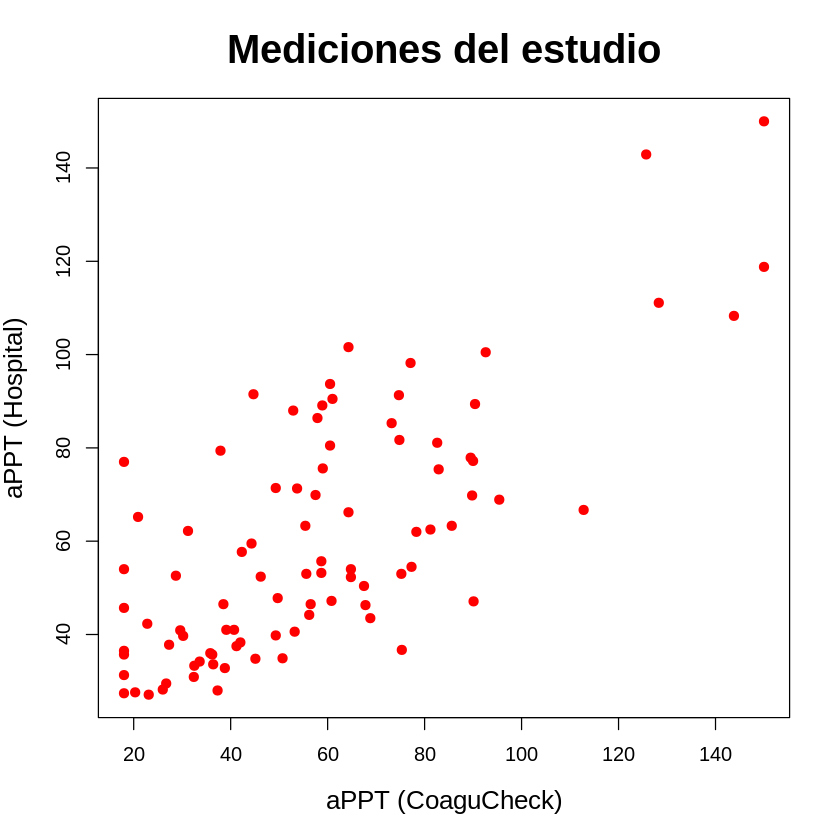

In [ ]:
# Se realiza el scatter plot
plot(x=df$COAGU, y=df$HOSP, xlab="aPPT (CoaguCheck)", ylab="aPPT (Hospital)",
     main="Mediciones del estudio", col="red", pch=19, cex.lab=1.3, cex.main=2)

In [ ]:
# Se aculcula el coeficiente de correlación de Pearson entre ambas variables
# de la muestra
r <- cor(df$HOSP, df$COAGU)
r

[1] 0.735034

El __coeficente de correlación__ de la muestra es de 0.7350.

In [ ]:
# Para hacer la prueba de hipótesis se calcula el estadístico de prueba
# que se muestra en la página 452, ecuación 9.7.3

n <- dim(df)[1] # Tamaño de la muestra

(t <- r*sqrt((n-2)/(1-r**2))) # Ecuación 9.7.3

# Se calcula el p-value
1-pt(t, df=n-2)

[1] 10.1695

[1] 0

Puede verse que el t de prueba es 10.1700, valor asociado a un valor prácticamente _p~10^-16 < 0.025_ (donde el 0.025=0.05/2 viene de que es una prueba bilateral con significancia de 0.05). Por esto, se infiere que con una significancia de 0.05, __el coeficiente de correlación es distinto de 0__.

In [ ]:
# Para calcular el intervalo de confianza
res <- cor.test(df$HOSP, df$COAGU, method = "pearson")
res


	Pearson's product-moment correlation

data:  df$HOSP and df$COAGU
t = 10.17, df = 88, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6227350 0.8176615
sample estimates:
     cor 
0.735034 


El __intervalo de confianza del 95% del coeficiente de correlación__ es (0.6227, 0.8177)